In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
USE=True
# Set the impact category to be used
if USE:
    folder = "Resources"
    impact_score = "Abiotic depletion [kgSb-eq/kWh]"
    cumulative_impact = "Abiotic depletion [kgSb-eq]"
    threshold_c = "Concern Threshold [kgSb-eq/kWh]"
    threshold_i = "Indifference Threshold [kgSb-eq/kWh]"
    unit= "kgSb-eq/kWh"
else:
    folder = "ClimateChange"
    impact_score = "Climate change [kgCO2-eq/kWh]"
    cumulative_impact = "Climate change [kgCO2-eq]"
    threshold_c = "Concern Threshold [kgCO2-eq/kWh]"
    threshold_i = "Indifference Threshold [kgCO2-eq/kWh]"
    unit= "kgCO2-eq/kWh"

In [204]:
# Load the data
results_df = pd.read_csv(f"results/{folder}/batch_run_results.csv")

In [ ]:
# Select the columns
df = results_df[['Year', 'RunId', 'seed', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback', 'Impact count', 'Total product', 'End-of-life - sold', 'End-of-life - recycled', 'End-of-life - landfilled', "Effect"]].copy()

# Calculate Yearly electricity production and Impact
df.loc[:, 'Yearly electricity production'] = df.loc[:, 'Total product'] * 1.825  # conversion from Wp to kWh/year considering 5 hours of peak sun per day
df.loc[:, 'Impact'] = df.loc[:, 'Yearly electricity production'] * df.loc[:, 'Impact count']

# Calculate the total end-of-life paths
total_end_of_life = df['End-of-life - sold'] + df['End-of-life - recycled'] + df['End-of-life - landfilled']

# Avoid division by zero by replacing zero totals with NaN
total_end_of_life = total_end_of_life.replace(0, float('nan'))

# Calculate the percentages
df.loc[:, 'End-of-life - sold'] = 100 * df.loc[:, 'End-of-life - sold'] / total_end_of_life
df.loc[:, 'End-of-life - recycled'] = 100 * df.loc[:, 'End-of-life - recycled'] / total_end_of_life
df.loc[:, 'End-of-life - circular pathways'] = df.loc[:, 'End-of-life - sold'] + df.loc[:, 'End-of-life - recycled']
df.loc[:, 'End-of-life - landfilled'] = 100 * df.loc[:, 'End-of-life - landfilled'] / total_end_of_life

df = df.fillna(0)

# Aggregate the data to model level
results_df_agg = df.groupby(['RunId', 'Year', 'seed']).agg({
    'threshold_concern': 'first',
    'threshold_indifference': 'first',
    'negative_feedback': 'first',
    'positive_feedback': 'first',
    'Impact count': 'first',
    'Impact': 'first',
    'Total product': 'first',
    'End-of-life - circular pathways': 'first',
    'End-of-life - landfilled': 'first',
    'Effect': 'first'
}).reset_index()

# Calculate cumulative impact per year
results_df_agg['Cumulative impact'] = results_df_agg.groupby(['Year', 'RunId', 'seed', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback'])['Impact'].cumsum()

results_df_agg.head(100)

,RunId,Year,seed,threshold_concern,threshold_no_concern,negative_feedback,positive_feedback,Impact count,Impact,Total product,End-of-life - circular pathways,End-of-life - landfilled,Effect,Cumulative impact
0,0,2020,1,0.000024,0.000011,0.5,1,0.000022,1.620235e+06,4.092100e+10,0.000000,0.000000,0.0,1.620235e+06
1,0,2021,1,0.000024,0.000011,0.5,1,0.000022,1.889194e+06,4.771389e+10,0.358076,99.641924,0.0,1.889194e+06
2,0,2022,1,0.000024,0.000011,0.5,1,0.000023,2.370382e+06,5.563439e+10,0.187050,99.812950,0.0,2.370382e+06
3,0,2023,1,0.000024,0.000011,0.5,1,0.000023,2.767522e+06,6.486970e+10,0.178057,99.821943,0.0,2.767522e+06
4,0,2024,1,0.000024,0.000011,0.5,1,0.000023,3.227226e+06,7.563807e+10,0.138591,99.861409,0.0,3.227226e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,2022,1,0.000024,0.000012,0.5,1,0.000023,2.370382e+06,5.563439e+10,0.187050,99.812950,0.0,2.370382e+06
96,3,2023,1,0.000024,0.000012,0.5,1,0.000023,2.767522e+06,6.486970e+10,0.178057,99.821943,0.0,2.767522e+06
97,3,2024,1,0.000024,0.000012,0.5,1,0.000023,3.227226e+06,7.563807e+10,0.138591,99.861409,0.0,3.227226e+06
98,3,2025,1,0.000024,0.000012,0.5,1,0.000023,3.764088e+06,8.819399e+10,0.153983,99.846017,0.0,3.764088e+06


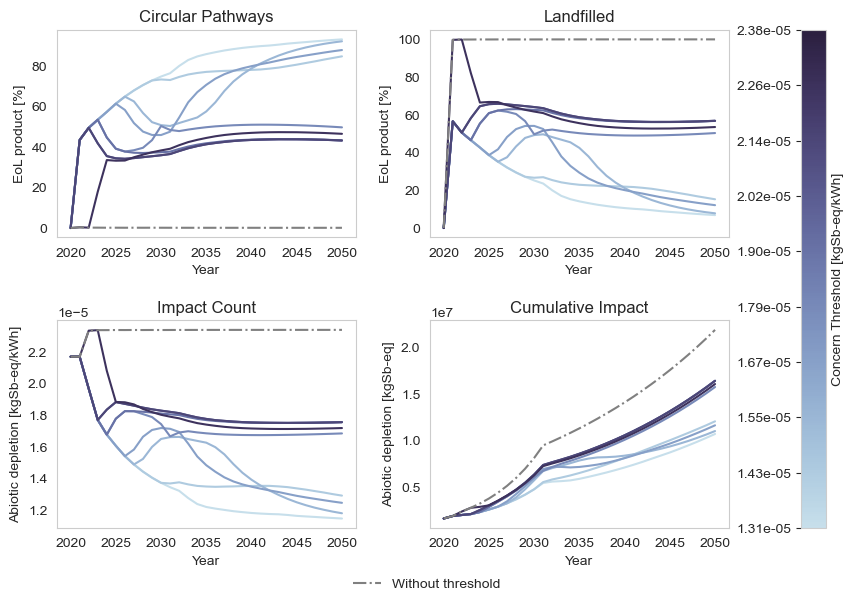

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.set_style("whitegrid")

# Filter the DataFrame
filtered_df = results_df_agg[(results_df_agg["threshold_indifference"] == results_df_agg["threshold_indifference"].min()) & (results_df_agg["seed"] == 1)]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot configurations
plot_configs = [
    {"y": "End-of-life - circular pathways", "ylabel": "EoL product [%]", "title": "Circular Pathways", "ax": axs[0, 0]},
    {"y": "End-of-life - landfilled", "ylabel": "EoL product [%]", "title": "Landfilled", "ax": axs[0, 1]},
    {"y": "Cumulative impact", "ylabel": cumulative_impact, "xlabel": "Year", "title": "Cumulative Impact", "ax": axs[1, 1]},
    {"y": "Impact count", "ylabel": impact_score, "xlabel": "Year", "title": "Impact Count", "ax": axs[1, 0]},
]

# Create line plots
for config in plot_configs:
    g = sns.lineplot(
        data=filtered_df,
        x="Year",
        y=config["y"],
        hue="threshold_concern",
        palette=color_palette,
        ax=config["ax"],
        legend=False,
    )
    g.set(ylabel=config["ylabel"], title=config["title"])
    if "xlabel" in config:
        g.set(xlabel=config["xlabel"])

# Remove grid
for ax in axs.flat:
    ax.grid(False)

# Add space between the 2 rows of subplots
plt.subplots_adjust(top=0.95, bottom=0.12, right=0.999, left=0.1, hspace=0.4, wspace=0.25)


# For max concern threshold, color = grey
for ax in axs.flat:
    ax.lines[-1].set_linestyle("-.")
    ax.lines[-1].set_linewidth(1.5)
    ax.lines[-1].set_color("grey")

# Create a single color bar for all subplots
unique_thresholds = np.sort(filtered_df['threshold_concern'].unique())
norm = plt.Normalize(unique_thresholds.min(), unique_thresholds.max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

# Add the color bar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.08, pad=0.09)
cbar.set_label(threshold_c)

# Set the ticks to the unique values of 'threshold_concern'
cbar.set_ticks(unique_thresholds)
cbar.ax.yaxis.tick_left()
cbar.set_ticklabels([f'{val:.2e}' for val in unique_thresholds])

# Add grey line for linear coupling
custom_lines_1 = [Line2D([0], [0], color='grey', linestyle='-.', lw=1.5, label='Without threshold')]
fig.legend(handles=custom_lines_1, loc='lower center', fontsize=10, frameon=False)


# save the plot high quality
plt.savefig(f"results/{folder}/lineplotconcern.png", dpi=300)

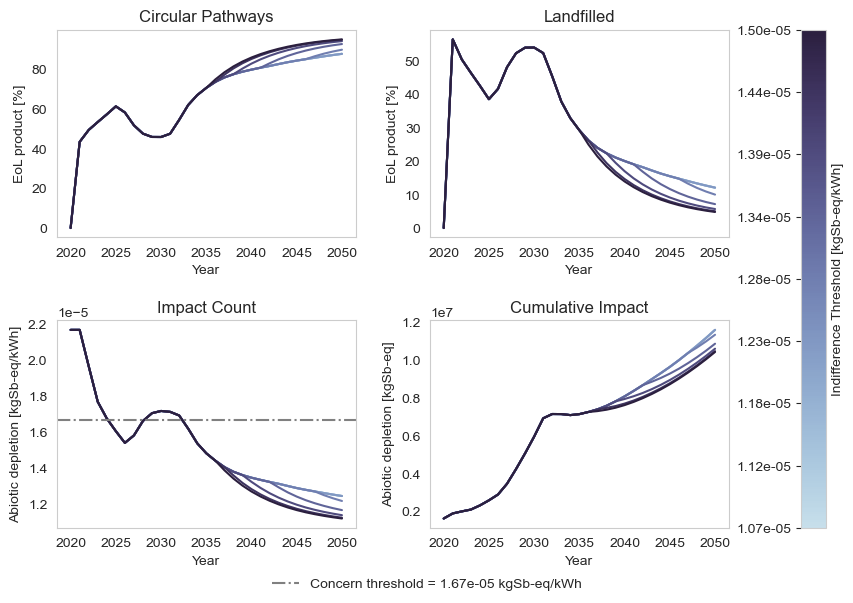

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set the concern threshold
unique_thresholds = np.sort(filtered_df['threshold_indifference'].unique())
unique_thresholds1 = np.sort(results_df_agg['threshold_concern'].unique())
concern_threshold = unique_thresholds1[3]

# Filter the DataFrame
filtered_df = results_df_agg[(results_df_agg["seed"] == 1) & (results_df_agg["threshold_concern"] == concern_threshold) & (results_df_agg["threshold_indifference"] < 0.9*concern_threshold)]

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.set_style("whitegrid")
# linecolors = [color_palette(i / (len(unique_thresholds) - 1)) for i in range(len(unique_thresholds))]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot configurations
plot_configs = [
    {"y": "End-of-life - circular pathways", "ylabel": "EoL product [%]", "title": "Circular Pathways", "ax": axs[0, 0]},
    {"y": "End-of-life - landfilled", "ylabel": "EoL product [%]", "title": "Landfilled", "ax": axs[0, 1]},
    {"y": "Cumulative impact", "ylabel": cumulative_impact, "xlabel": "Year", "title": "Cumulative Impact", "ax": axs[1, 1]},
    {"y": "Impact count", "ylabel": impact_score, "xlabel": "Year", "title": "Impact Count", "ax": axs[1, 0]},
]

# Create line plots
for config in plot_configs:
    g = sns.lineplot(
        data=filtered_df,
        x="Year",
        y=config["y"],
        hue="threshold_indifference",
        palette=color_palette,
        ax=config["ax"],
        legend=False
    )
    g.set(ylabel=config["ylabel"], title=config["title"])
    if "xlabel" in config:
        g.set(xlabel=config["xlabel"])

# Remove grid
for ax in axs.flat:
    ax.grid(False)

# Add an horizontal for the concern threshold in the lower right subplot
axs[1, 0].axhline(y=concern_threshold, color='grey', linestyle='-.', linewidth=1.5)

# Add space between the 2 rows of subplots
plt.subplots_adjust(top=0.95, bottom=0.12, right=0.999, left=0.1, hspace=0.4, wspace=0.25)

# Create a single color bar for all subplots
norm = plt.Normalize(unique_thresholds.min(), unique_thresholds.max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

# Add the color bar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.08, pad=0.09)
cbar.set_label(threshold_i)

# Set the ticks to the unique values of 'threshold_concern'
cbar.set_ticks(unique_thresholds)
cbar.ax.yaxis.tick_left()
cbar.set_ticklabels([f'{val:.2e}' for val in unique_thresholds])

# Add grey line for linear coupling
custom_lines_1 = [Line2D([0], [0], color='grey', linestyle='-.', lw=1.5, label=f'Concern threshold = {concern_threshold:.2e} {unit}')]
fig.legend(handles=custom_lines_1, loc='lower center', fontsize=10, frameon=False)

# save the plot high quality
plt.savefig(f"results/{folder}/lineplotindifference/{concern_threshold}.png", dpi=300)

In [267]:
filtered_df


,RunId,Year,seed,threshold_concern,threshold_no_concern,negative_feedback,positive_feedback,Impact count,Impact,Total product,End-of-life - circular pathways,End-of-life - landfilled,Effect,Cumulative impact
2108,68,2020,1,0.000017,0.000015,0.5,1,0.000022,1.620235e+06,4.092100e+10,0.000000,0.000000,1.0,1.620235e+06
2109,68,2021,1,0.000017,0.000015,0.5,1,0.000022,1.889194e+06,4.771389e+10,43.475789,56.524211,1.0,1.889194e+06
2110,68,2022,1,0.000017,0.000015,0.5,1,0.000020,1.997006e+06,5.563439e+10,49.488387,50.511613,1.0,1.997006e+06
2111,68,2023,1,0.000017,0.000015,0.5,1,0.000018,2.093837e+06,6.486970e+10,53.487327,46.512673,1.0,2.093837e+06
2112,68,2024,1,0.000017,0.000015,0.5,1,0.000017,2.313276e+06,7.563807e+10,57.352399,42.647601,1.0,2.313276e+06
2113,68,2025,1,0.000017,0.000015,0.5,1,0.000016,2.583432e+06,8.819399e+10,61.402367,38.597633,0.0,2.583432e+06
2114,68,2026,1,0.000017,0.000015,0.5,1,0.000015,2.889751e+06,1.028342e+11,58.315758,41.684242,0.0,2.889751e+06
2115,68,2027,1,0.000017,0.000015,0.5,1,0.000016,3.460511e+06,1.199047e+11,51.813563,48.186437,0.0,3.460511e+06
2116,68,2028,1,0.000017,0.000015,0.5,1,0.000017,4.241201e+06,1.398088e+11,47.616991,52.383009,0.0,4.241201e+06
2117,68,2029,1,0.000017,0.000015,0.5,1,0.000017,5.073710e+06,1.630171e+11,45.947277,54.052723,1.0,5.073710e+06
